In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
sc.set_figure_params(dpi=300, dpi_save=300, vector_friendly=True, color_map = 'viridis')
sc.settings.verbosity = 3

In [3]:
adata = sc.read("/Users/athib/Desktop/CovidRSV/scRNA2/COVIDRSV_Pass2_Cleaned.h5ad")


In [4]:
azimuthannotations = pd.read_csv("/Users/athib/Desktop/CovidRSV/scRNA2/AzimuthPredictions.csv", index_col=0)

In [5]:
azimuthannotations = azimuthannotations.reindex(adata.obs.index)

In [6]:
azimuthannotations['Annotation'] = adata.obs['Annotation'].copy()

In [7]:
azimuthlabels = ['B naive',
                'B intermediate',
                'B memory',
                'Plasmablast',
                'CD4 Naive',
                'CD4 TCM',
                'CD4 TEM',
                'Treg',
                'CD8 Naive',
                'CD8 TCM',
                'CD8 TEM',
                'dnT',
                'MAIT',
                'gdT',
                'CD4 Proliferating',
                'CD8 Proliferating', 
                'NK', 
                'NK_CD56bright',
                'NK Proliferating',
                'CD14 Mono',
                'CD16 Mono',
                'cDC1', 
                'cDC2',
                'ASDC', 
                'pDC',
                'Eryth',
                'HSPC',
                'ILC',
                'Platelet'
                ]


In [8]:
annotationslabels = adata.obs['Annotation'].cat.categories

In [9]:
list(annotationslabels)

['AXL+ SIGLEC6+ DC',
 'B_5',
 'B_6',
 'CD4+ TCM',
 'CD4+ TEM',
 'CD8+ γδ T',
 'CD14+ Monocyte',
 'CD16+ Monocyte',
 'CD16+ NK',
 'CD56+ NK',
 'CD163+ CD14+ Monocyte',
 'DN2 B',
 'Erythroblast',
 'GZMK+ T',
 'HSC',
 'ILC-like',
 'ISG+ B',
 'ISG+ CD4+ T',
 'ISG+ CD8+ T',
 'ISG+ CD14+ Monocyte',
 'ISG+ CD16+ Monocyte',
 'ISG+ Memory CD4+ T',
 'ISG+ TrB',
 'ISG+ Treg',
 'MAIT',
 'MGK',
 'Memory B',
 'Memory CD4+ T_3',
 'Memory CD4+ T_6',
 'Memory Treg',
 'Mo-DC',
 'Naive B',
 'Naive CD4+ T',
 'Naive CD8+ T',
 'Naive Treg',
 'PC',
 'Prolif/Cycling Cytotoxic T',
 'Prolif/Cycling NK',
 'Prolif/Cycling T',
 'Temra',
 'TrB',
 'cDC1',
 'cDC2',
 'pDC',
 'γδ T']

In [10]:
annotationslabels = ['Naive B',
                    'ISG+ B',
                    'B_5',
                    'TrB',
                    'ISG+ TrB',
                    'Memory B',
                    'B_6',
                    'DN2 B',
                    'PC',
                    'Naive CD4+ T',
                    'ISG+ CD4+ T',
                    'CD4+ TCM',
                    'CD4+ TEM',
                    'ISG+ Memory CD4+ T',
                    'Memory CD4+ T_3',
                    'Memory CD4+ T_6',
                    'Naive Treg',
                    'ISG+ Treg',
                    'Memory Treg',
                    'Naive CD8+ T',
                    'ISG+ CD8+ T',
                    'Temra',                     
                    'GZMK+ T',
                    'MAIT',
                    'γδ T',
                    'CD8+ γδ T',
                    'Prolif/Cycling Cytotoxic T',
                    'Prolif/Cycling T',
                    'CD16+ NK',
                    'CD56+ NK',
                    'Prolif/Cycling NK',
                    'CD14+ Monocyte',
                    'ISG+ CD14+ Monocyte',
                    'CD163+ CD14+ Monocyte',
                    'CD16+ Monocyte',
                    'ISG+ CD16+ Monocyte',
                    'Mo-DC',
                    'cDC1',
                    'cDC2',
                    'AXL+ SIGLEC6+ DC',
                    'pDC',
                    'Erythroblast',
                    'HSC',
                    'ILC-like',
                    'MGK']

In [11]:
numazimuth = len(azimuthlabels)
numannotation = len(annotationslabels)

In [12]:
matrix = np.zeros((numannotation, numazimuth))

In [ ]:
indexi = 0
for curannotation in annotationslabels:
    indexj = 0
    curannotationnum =  sum(azimuthannotations['Annotation'] == curannotation)
    print(curannotation)
    for curazimuth in azimuthlabels:
        curazimuthnum =  sum( (azimuthannotations['x'] == curazimuth) & (azimuthannotations['Annotation'] == curannotation) )
        matrix[indexi, indexj] = curazimuthnum/curannotationnum
        indexj += 1
    indexi += 1

Naive B
ISG+ B
B_5
TrB
ISG+ TrB
Memory B
B_6
DN2 B
PC
Naive CD4+ T
ISG+ CD4+ T
CD4+ TCM
CD4+ TEM
ISG+ Memory CD4+ T
Memory CD4+ T_3
Memory CD4+ T_6
Naive Treg
ISG+ Treg
Memory Treg
Naive CD8+ T
ISG+ CD8+ T
Temra
GZMK+ T
MAIT
γδ T
CD8+ γδ T
Prolif/Cycling Cytotoxic T
Prolif/Cycling T
CD16+ NK
CD56+ NK
Prolif/Cycling NK
CD14+ Monocyte
ISG+ CD14+ Monocyte
CD163+ CD14+ Monocyte


In [29]:
newdf = pd.DataFrame(matrix, index=annotationslabels, columns=azimuthlabels)

In [30]:
newdf

,B naive,B intermediate,B memory,Plasmablast,CD4 Naive,CD4 TCM,CD4 TEM,Treg,CD8 Naive,CD8 TCM,...,CD14 Mono,CD16 Mono,cDC1,cDC2,ASDC,pDC,Eryth,HSPC,ILC,Platelet
Naive B,0.860134,0.139675,0.000191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ISG+ B,0.965161,0.034839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B_5,0.796045,0.203955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TrB,0.984246,0.015754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ISG+ TrB,0.993146,0.006854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Memory B,0.191290,0.801785,0.006925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B_6,0.014461,0.362625,0.615128,0.006674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DN2 B,0.012367,0.987633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PC,0.000000,0.002096,0.000000,0.974843,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Naive CD4+ T,0.000000,0.000000,0.000000,0.000000,0.349845,0.644871,0.000015,0.000611,0.002326,0.000132,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000007,0.000000


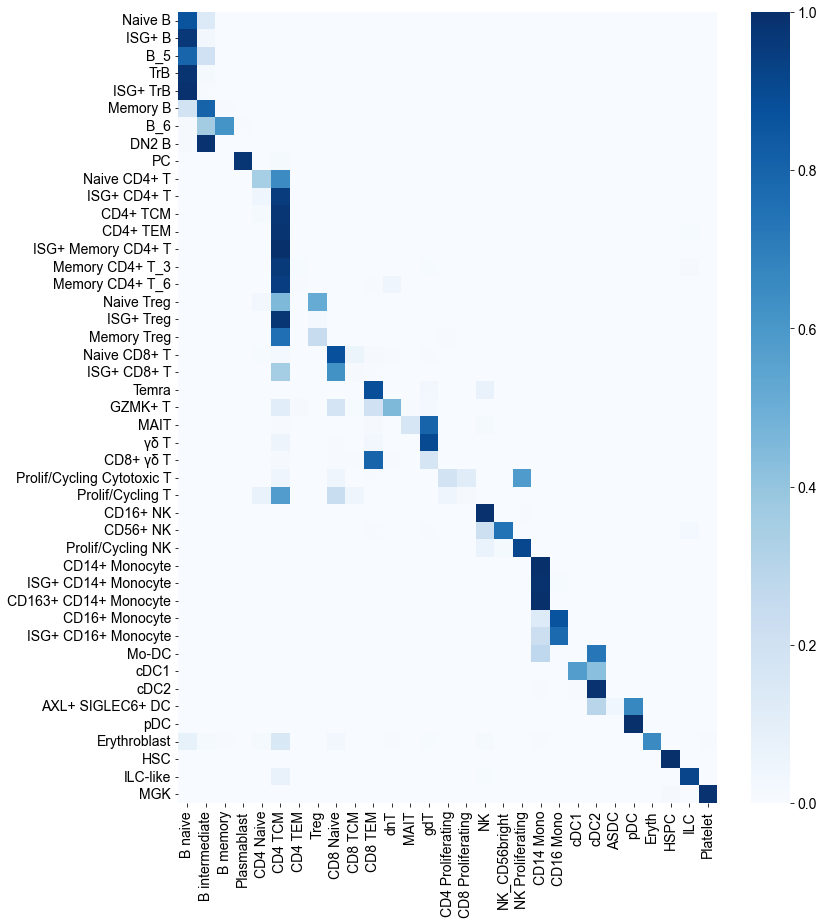

In [31]:
fig = plt.figure(figsize=(12,14))
sb.heatmap(newdf, annot=False, cmap='Blues')

fig.savefig('AzimuthHeatmap.pdf', format='pdf', bbox_inches='tight')
